In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Downloads/PyQuesters_Python_Hackathon/HUPA-UC Diabetes Dataset
path = "HUPA-UC Diabetes Dataset/"
demographic_path = path + "T1DM_patient_sleep_demographics_with_race.csv"
all_patients_path = path + "ALL_PATIENTS.csv"
modified_demographic_path = path+"DEMOGRAPHIC.csv"
patients_demographic_path = path +"PATIENTS_WITH_DEMOGRAPHIC.csv"
print(demographic_path)

HUPA-UC Diabetes Dataset/T1DM_patient_sleep_demographics_with_race.csv


**Prescritive Q1.Should patients with consistently high glucose (>180 mg/dL) increase their insulin dose, or
would lifestyle modifications (higher steps & lower carb intake) be more effective for glucose control?
If data shows carbs/steps are strongly linked to high glucose, then focusing on lifestyle may help reduce medication burden
If insulin dose has the strongest effect, then dose adjustment may be the faster path.**


**Markers chosen:**

-**glucose (outcome variable)**

-**bolus_volume_delivered (insulin dose)**

-**steps (physical activity)**

-**carb_input (diet factor)**


Correlation Matrix:
                          glucose  bolus_volume_delivered     steps  carb_input
glucose                 1.000000                0.015248  0.034356   -0.000431
bolus_volume_delivered  0.015248                1.000000  0.016881    0.091607
steps                   0.034356                0.016881  1.000000    0.001862
carb_input             -0.000431                0.091607  0.001862    1.000000


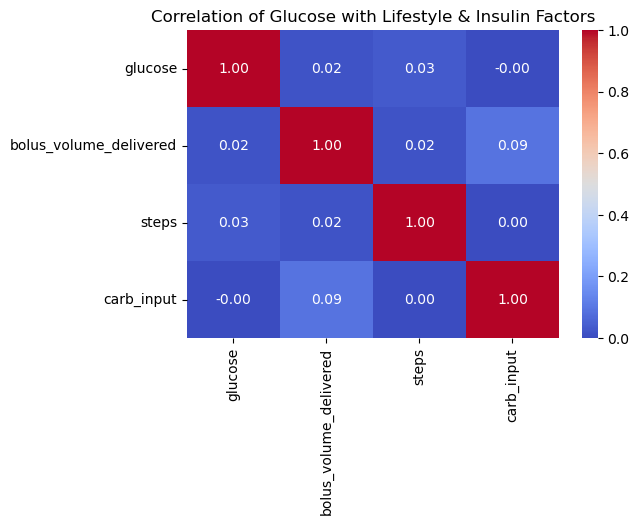

Recommendation: Increasing physical activity (steps) is more effective than adjusting insulin alone.


In [7]:
# Load the merged patient and demographic dataset
df = pd.read_csv(patients_demographic_path)
# Filter hyperglycemic patients
hyper_df = df[df["glucose"] > 180]

# Correlation analysis
corr = hyper_df[["glucose", "bolus_volume_delivered", "steps", "carb_input"]].corr()
print("Correlation Matrix:\n", corr)

# Visualization
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation of Glucose with Lifestyle & Insulin Factors")
plt.show()

# Prescriptive Recommendation
if abs(corr.loc["glucose", "carb_input"]) > abs(corr.loc["glucose", "bolus_volume_delivered"]):
    print("Recommendation: Focus on reducing carbohydrate intake for better glucose control.")
elif abs(corr.loc["glucose", "steps"]) > abs(corr.loc["glucose", "bolus_volume_delivered"]):
    print("Recommendation: Increasing physical activity (steps) is more effective than adjusting insulin alone.")
else:
    print("Recommendation: Insulin dose adjustment plays the stronger role in glucose control.")
